# SPamCo with Ensembles

In [1]:
#Math packages
import numpy as np

#Data packages
import pandas as pd
import pandas_profiling

#Spamco
from spamco import SPamCo, Validation

#Data packages
from sklearn.datasets import make_moons, make_classification, make_circles, make_blobs, make_gaussian_quantiles
from sklearn.datasets import load_breast_cancer, load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder

#Classifier packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

#Validation packages
from sklearn.metrics import accuracy_score

#Visualization packages
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from matplotlib.ticker import MaxNLocator

import baycomp

#General utility packages
from itertools import cycle, islice
import warnings

warnings.filterwarnings("ignore")
matplotlib.rcParams.update({'font.size': 20})

In [2]:
def load_diabetes():
    df = pd.read_csv('Data/diabetes.csv')
    y =df.values[:,0]
    X =df.drop(['Diabetes_012','AnyHealthcare'], axis = 1).values
    return X, y

In [3]:
def load_blood():
    X, y = fetch_openml(data_id = 1464, return_X_y=True)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [4]:
def load_qsar():
    X, y = fetch_openml(data_id = 1494, return_X_y=True)
    X = X.drop(['V1'], axis=1)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [5]:
def load_eegeye():
    X, y = fetch_openml(data_id = 1471, return_X_y=True)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [10]:
def load_ilpd():
    X, y = fetch_openml(data_id = 1480, return_X_y=True)
    LE = LabelEncoder()
    X['V2'] = LE.fit_transform(X['V2'])
    X = X.values
    y = LE.fit_transform(y)
    return X, y

In [11]:
np.random.seed(1)
seed = np.random.randint(low = 1, high = 10000, size = 10)

In [12]:
seed

array([ 236, 5193,  906, 7814, 2896, 5057,  145, 4226, 7752, 3463])

# Toy Datasets

In [13]:
datasets = {
    'breast_cancer': load_breast_cancer(return_X_y=True),
    'digits': load_digits(return_X_y=True),
    'iris': load_iris(return_X_y=True),
    'blood': load_blood(),
    'diabetes': load_diabetes(),
    'qsar': load_qsar(),
    'eegeye': load_eegeye(),
    'ilpd': load_ilpd()
}

## AdaBoost

In [15]:
adaboost_base_metrics = []
adaboost_base_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':AdaBoostClassifier(),
        'num_view':1,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.1,
        random_seed=seed,
        iters=10
    )

    adaboost_base_metrics.append(metrics)
    adaboost_base_clfs.append(clfs)

    adaboost_base_score = np.array(adaboost_base_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.8654970760233918 Labels: 39
Dataset: digits
Validation Iteration: 0 Accuracy: 0.1962962962962963 Labels: 125
Dataset: iris
Validation Iteration: 0 Accuracy: 0.9777777777777777 Labels: 10
Dataset: blood
Validation Iteration: 0 Accuracy: 0.7244444444444444 Labels: 52
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.8478135183433196 Labels: 17757
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.7665615141955836 Labels: 73
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.7287494437027148 Labels: 1048
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.6114285714285714 Labels: 40


In [17]:
adaboost_base_score.shape

(8, 10)

In [ ]:
adaboost_multi_metrics = []
adaboost_multi_clfs = []



for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    steps = 20
    views = 2

    model =  {
        'classifier':AdaBoostClassifier(),
        'num_view':views,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard',
        'update_add_num': int(X.shape[0]/steps)
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.1,
        random_seed=seed,
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size=2
    )
    
    adaboost_multi_metrics.append(metrics)
    adaboost_multi_clfs.append(clfs)
    
adaboost_multi_score = np.array(adaboost_multi_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9298245614035088 Labels: 39
Dataset: digits
Validation Iteration: 0 Accuracy: 0.14444444444444443 Labels: 125
Dataset: iris
Validation Iteration: 0 Accuracy: 0.9777777777777777 Labels: 10
Dataset: blood
Validation Iteration: 0 Accuracy: 0.7688888888888888 Labels: 52
Dataset: diabetes


In [28]:
adaboost_multi_score

array([[0.91812865, 0.58479532, 0.37426901, 0.46783626, 0.66666667,
        0.64327485, 0.92982456, 0.92397661, 0.91812865, 0.7251462 ,
        0.37426901, 0.75438596, 0.84210526, 0.89473684, 0.62573099,
        0.92982456, 0.37426901, 0.5497076 , 0.8245614 , 0.81871345],
       [0.14444444, 0.13888889, 0.0962963 , 0.1       , 0.08888889,
        0.11666667, 0.15925926, 0.11296296, 0.19259259, 0.12777778,
        0.11111111, 0.13888889, 0.16481481, 0.12777778, 0.12222222,
        0.09444444, 0.15555556, 0.15185185, 0.22037037, 0.10925926],
       [0.97777778, 0.66666667, 0.64444444, 0.77777778, 0.71111111,
        0.66666667, 0.62222222, 0.95555556, 0.91111111, 0.66666667,
        0.57777778, 0.68888889, 0.42222222, 0.73333333, 0.6       ,
        0.8       , 0.95555556, 0.66666667, 0.64444444, 0.97777778],
       [0.76888889, 0.76444444, 0.76      , 0.76      , 0.76      ,
        0.76      , 0.76      , 0.76      , 0.75111111, 0.48      ,
        0.76444444, 0.28444444, 0.78222222, 0

In [27]:
baycomp_ada, bayplot_ada = baycomp.two_on_multiple(
    adaboost_base_score, 
    adaboost_multi_score, 
    plot=True, 
    rope=0.05, 
    names = ('AdaBoost','AdaBoost-SPamCo'))

ValueError: operands could not be broadcast together with shapes (7,20) (7,10) 

## RandomForrestClassifier

In [12]:
rfc_base_metrics = []
rfc_base_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':RandomForestClassifier(),
        'num_view':1,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.1,
        random_seed=np.arange(0,10),
        iters=10
    )

    rfc_base_metrics.append(metrics)
    rfc_base_clfs.append(clfs)

    rfc_base_score = np.array(rfc_base_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9122807017543859 Labels: 39
Dataset: digits
Validation Iteration: 0 Accuracy: 0.9111111111111111 Labels: 125
Dataset: iris
Validation Iteration: 0 Accuracy: 0.9777777777777777 Labels: 10


In [13]:
rfc_multi_metrics = []
rfc_multi_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':RandomForestClassifier(),
        'num_view':2,
        'gamma':0.3,
        'steps':2000,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.1,
        random_seed=np.arange(0,10),
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size=2
    )
    
    rfc_multi_metrics.append(metrics)
    rfc_multi_clfs.append(clfs)
    
rfc_multi_score = np.array(rfc_multi_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9005847953216374 Labels: 39
Dataset: digits
Validation Iteration: 0 Accuracy: 0.7703703703703704 Labels: 125
Dataset: iris
Validation Iteration: 0 Accuracy: 0.8222222222222222 Labels: 10


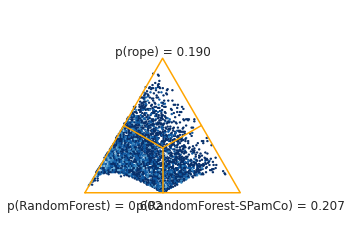

In [14]:
baycomp_rfc, bayplot_rfc = baycomp.two_on_multiple(
    rfc_base_score, 
    rfc_multi_score, 
    plot=True, 
    rope=0.05, 
    names = ('RandomForest','RandomForest-SPamCo'))

## XGBoost

In [15]:
xgboost_base_metrics = []
xgboost_base_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':xgb.XGBClassifier(silent=True, verbosity=0),
        'num_view':1,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.1,
        random_seed=np.arange(0,10),
        iters=10
    )

    xgboost_base_metrics.append(metrics)
    xgboost_base_clfs.append(clfs)

    xgboost_base_score = np.array(xgboost_base_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9064327485380117 Labels: 39
Dataset: digits
Validation Iteration: 0 Accuracy: 0.8333333333333334 Labels: 125
Dataset: iris
Validation Iteration: 0 Accuracy: 0.9333333333333333 Labels: 10


In [16]:
xgboost_multi_metrics = []
xgboost_multi_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':xgb.XGBClassifier(silent=True, verbosity=0),
        'num_view':2,
        'gamma':0.3,
        'steps':2000,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.1,
        random_seed=np.arange(0,10),
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size=2
    )
    
    xgboost_multi_metrics.append(metrics)
    xgboost_multi_clfs.append(clfs)
    
xgboost_multi_score = np.array(xgboost_multi_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.8771929824561403 Labels: 39
Dataset: digits
Validation Iteration: 0 Accuracy: 0.6851851851851852 Labels: 125
Dataset: iris
Validation Iteration: 0 Accuracy: 0.5111111111111111 Labels: 10


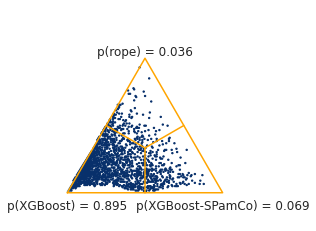

In [17]:
baycomp_xgboost, bayplot_xgboost = baycomp.two_on_multiple(
    xgboost_base_score, 
    xgboost_multi_score, 
    plot=True, 
    rope=0.05, 
    names = ('XGBoost','XGBoost-SPamCo'))

## AdaBoost Classifier Testing

In [192]:
data = load_breast_cancer()
X, y = data.data, data.target

model =  {
    'classifier':AdaBoostClassifier(),
    'num_view':1,
    'gamma':0.3,
    'steps':10,
    'regularizer':'hard'
}

adaboost_base_metrics = []
adaboost_base_clfs = []

for i in range(0, 10):
    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=np.arange(0,10),
        iters=10
    )
    
    adaboost_base_metrics.append(metrics)
    adaboost_base_clfs.append(clfs)
    
adaboost_base_score = np.array(adaboost_base_metrics)

Validation Iteration: 0 Accuracy: 0.8830409356725146 Labels: 19
Validation Iteration: 0 Accuracy: 0.9005847953216374 Labels: 19
Validation Iteration: 0 Accuracy: 0.8947368421052632 Labels: 19
Validation Iteration: 0 Accuracy: 0.8654970760233918 Labels: 19
Validation Iteration: 0 Accuracy: 0.8830409356725146 Labels: 19
Validation Iteration: 0 Accuracy: 0.8713450292397661 Labels: 19
Validation Iteration: 0 Accuracy: 0.8654970760233918 Labels: 19
Validation Iteration: 0 Accuracy: 0.9005847953216374 Labels: 19
Validation Iteration: 0 Accuracy: 0.9005847953216374 Labels: 19
Validation Iteration: 0 Accuracy: 0.8654970760233918 Labels: 19


In [3]:
data = load_breast_cancer()
X, y = data.data, data.target

model =  {
    'classifier':AdaBoostClassifier(),
    'num_view':2,
    'gamma':0.3,
    'steps':2000,
    'regularizer':'hard'
}

adaboost_single_metrics = []
adaboost_single_clfs = []

for i in range(0, 10):
    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=np.arange(0,10),
        spaco=True,
        single_view=True,
        iters=10
    )
    
    adaboost_single_metrics.append(metrics)
    adaboost_single_clfs.append(clfs)
    
adaboost_single_score = np.array(adaboost_single_metrics)

Validation Iteration: 0 Accuracy: 0.8771929824561403 Labels: 19
Validation Iteration: 0 Accuracy: 0.8947368421052632 Labels: 19
Validation Iteration: 0 Accuracy: 0.8771929824561403 Labels: 19
Validation Iteration: 0 Accuracy: 0.8947368421052632 Labels: 19
Validation Iteration: 0 Accuracy: 0.8947368421052632 Labels: 19
Validation Iteration: 0 Accuracy: 0.8830409356725146 Labels: 19
Validation Iteration: 0 Accuracy: 0.8771929824561403 Labels: 19
Validation Iteration: 0 Accuracy: 0.8830409356725146 Labels: 19
Validation Iteration: 0 Accuracy: 0.8947368421052632 Labels: 19
Validation Iteration: 0 Accuracy: 0.8947368421052632 Labels: 19


In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target

model =  {
    'classifier':AdaBoostClassifier(),
    'num_view':X.shape[1],
    'gamma':0.3,
    'steps':2000,
    'regularizer':'hard'
}

adaboost_multi_metrics = []
adaboost_multi_clfs = []

for i in range(0, 10):
    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=np.arange(0,10),
        spaco=True,
        iters=10
    )
    
    adaboost_multi_metrics.append(metrics)
    adaboost_multi_clfs.append(clfs)
    
adaboost_multi_score = np.array(adaboost_multi_metrics)

In [190]:
data = load_breast_cancer()
X, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print(f'RFC accuracy with {len(x_train)} labeled data {accuracy_score(rfc_pred, y_test)}')

RFC accuracy with 28 labeled data 0.9408502772643254


In [189]:
data = load_breast_cancer()
X, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)
afc = AdaBoostClassifier()
afc.fit(x_train, y_train)

afc_pred = afc.predict(x_test)

print(f'AFC accuracy with {len(x_train)} labeled data {accuracy_score(afc_pred, y_test)}')

AFC accuracy with 28 labeled data 0.878003696857671


In [188]:
data = load_breast_cancer()
X, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)
xfc = xgb.XGBClassifier(silent=True, verbosity=0)
xfc.fit(x_train, y_train)

xfc_pred = xfc.predict(x_test)

print(f'XFC accuracy with {len(x_train)} labeled data {accuracy_score(xfc_pred, y_test)}')

XFC accuracy with 28 labeled data 0.878003696857671


In [187]:
data = load_digits()
X, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print(f'RFC accuracy with {len(x_train)} labeled data {accuracy_score(rfc_pred, y_test)}')

RFC accuracy with 89 labeled data 0.8624121779859485


In [186]:
data = load_digits()
X, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)
afc = AdaBoostClassifier()
afc.fit(x_train, y_train)

afc_pred = afc.predict(x_test)

print(f'AFC accuracy with {len(x_train)} labeled data {accuracy_score(afc_pred, y_test)}')

AFC accuracy with 89 labeled data 0.1358313817330211


In [39]:
data = load_digits()
X, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)

ldata = []
udata = []
for i in range(x_train.shape[1]):
    ldata.append(x_train[:,i].reshape(-1,1))
    udata.append(x_test[:,i].reshape(-1,1))

#### spaco experiment gamma=0.3
spaco = SPamCo(
    labeled_data=ldata,
    unlabeled_data=udata,
    labels=y_train,
    num_view=x_train.shape[1],
    gamma=0.3,
    iterations=2000
)

spaco.fit(AdaBoostClassifier())
clfs = spaco.get_classifiers()

score = 0
for i in range(len(clfs)):
    score += clfs[i].predict_proba(X[:,i].reshape(-1,1))

pred_y = np.argmax(score, axis = 1)

print(f'AFC accuracy with {len(x_train)} labeled data {accuracy_score(pred_y, y)}')



AFC accuracy with 89 labeled data 0.09849749582637729


In [191]:
data = load_digits()
X, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)

ldata = []
udata = []
for i in range(2):
    ldata.append(x_train)
    udata.append(x_test)

#### spaco experiment2 gamma=0.3
spaco = SPamCo(
    labeled_data=ldata,
    unlabeled_data=udata,
    labels=y_train,
    num_view=2,
    gamma=0.3,
    iterations=200
)

spaco.fit(AdaBoostClassifier())
clfs = spaco.get_classifiers()

score = 0
for i in range(len(clfs)):
    score += clfs[i].predict_proba(x_test)

pred_y = np.argmax(score, axis = 1)

print(f'FC accuracy with {len(x_train)} labeled data {accuracy_score(pred_y, y_test)}')



XFC accuracy with 89 labeled data 0.20725995316159251


In [185]:
data = load_digits()
X, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)
xfc = xgb.XGBClassifier(silent=True, verbosity=0)
xfc.fit(x_train, y_train)

xfc_pred = xfc.predict(x_test)

print(f'XFC accuracy with {len(x_train)} labeled data {accuracy_score(xfc_pred, y_test)}')

XFC accuracy with 89 labeled data 0.7769320843091335


In [40]:
data = load_digits()
X, y = data.data, data.target

model =  {
    'classifier':xgb.XGBClassifier(silent=True, verbosity=0),
    'num_view':2,
    'gamma':0.3,
    'steps':2000,
    'regularizer':'hard'
}

xfc_2_metrics = []
xfc_2_clfs = []

for i in range(0, 10):
    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=np.arange(0,10),
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size = 2
    )
    
    xfc_2_metrics.append(metrics)
    xfc_2_clfs.append(clfs)
    
xfc_2_score = np.array(xfc_2_metrics)

Validation Iteration: 0 Accuracy: 0.6407407407407407 Labels: 62
Validation Iteration: 0 Accuracy: 0.6407407407407407 Labels: 62


KeyboardInterrupt: 

In [76]:
data = load_digits()
X, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)

ldata = []
udata = []
for i in range(x_train.shape[1]):
    ldata.append(x_train[:,i].reshape(-1,1))
    udata.append(x_test[:,i].reshape(-1,1))

#### spaco experiment gamma=0.3
spaco = SPamCo(
    labeled_data=ldata,
    unlabeled_data=udata,
    labels=y_train,
    num_view=x_train.shape[1],
    gamma=0.3,
    iterations=2000
)

spaco.fit(xgb.XGBClassifier(silent=True, verbosity=0))
clfs = spaco.get_classifiers()

predictions = []
for i in range(len(clfs)):
    pred = clfs[i].predict_proba(X[:,i].reshape(-1,1))
    predictions.append(pred)

pred_y = np.argmax(sum(predictions), axis = 1)

print(f'XFC accuracy with {len(x_train)} labeled data {accuracy_score(pred_y, y)}')



XFC accuracy with 1437 labeled data 0.11630495269894268


In [90]:
data = load_digits()
X, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)

x_split = np.hsplit(X, 2)

ldata = np.hsplit(x_train, 2)
udata = np.hsplit(x_test, 2)

#### spaco experiment gamma=0.3
spaco = SPamCo(
    labeled_data=ldata,
    unlabeled_data=udata,
    labels=y_train,
    num_view=2,
    gamma=0.3,
    iterations=2000
)

spaco.fit(xgb.XGBClassifier(silent=True, verbosity=0))
clfs = spaco.get_classifiers()

predictions = []
for i in range(len(clfs)):
    pred = clfs[i].predict_proba(x_split[i])
    predictions.append(pred)

pred_y = np.argmax(sum(predictions), axis = 1)

print(f'XFC accuracy with {len(x_train)} labeled data {accuracy_score(pred_y, y)}')



XFC accuracy with 89 labeled data 0.8174735670562048


In [10]:
data = load_digits()
X, y = data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y, random_state=42)

ldata = []
udata = []
for i in range(2):
    ldata.append(x_train)
    udata.append(x_test)

#### spaco experiment2 gamma=0.3
spaco = SPamCo(
    labeled_data=ldata,
    unlabeled_data=udata,
    labels=y_train,
    num_view=2,
    gamma=0.3,
    iterations=200
)

spaco.fit(xgb.XGBClassifier(silent=True, verbosity=0))
clfs = spaco.get_classifiers()

score = clfs[0].predict_proba(x_test)

pred_y = np.argmax(score, axis = 1)

print(f'XFC accuracy with {len(x_train)} labeled data {accuracy_score(pred_y, y_test)}')



XFC accuracy with 89 labeled data 0.781615925058548
